In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_pickle('Data/data_with_embeddings.pkl')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23085 entries, 0 to 23084
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        22985 non-null  object
 1   Author full names              22985 non-null  object
 2   Author(s) ID                   22985 non-null  object
 3   Title                          23084 non-null  object
 4   Year                           23085 non-null  int64 
 5   Source title                   22303 non-null  object
 6   Volume                         21919 non-null  object
 7   Issue                          14218 non-null  object
 8   Art. No.                       8483 non-null   object
 9   Page start                     14421 non-null  object
 10  Page end                       14359 non-null  object
 11  Page count                     23085 non-null  int64 
 12  Cited by                       23085 non-null  int64 
 13  D

In [4]:
abstract_embeddings = np.array(data['Abstract_Embeddings'].tolist())

In [5]:
abstract_embeddings[0]

array([-1.44615229e-02, -5.00668995e-02,  3.58444117e-02,  3.84140871e-02,
        1.85158756e-02, -7.52251269e-03, -7.93940499e-02,  8.67789090e-02,
       -1.84392335e-03, -1.00329961e-03, -6.48231730e-02,  3.75620462e-02,
        5.73675521e-03,  2.86166798e-02,  1.87555235e-02,  5.64477034e-02,
        1.95740480e-02, -8.48573260e-03, -7.22303838e-02,  9.44518596e-02,
        2.17002407e-02, -3.43006253e-02, -2.55454797e-03,  1.92736518e-02,
       -4.36927704e-03,  5.09153008e-02, -1.09696642e-01,  3.17689357e-03,
        3.24725620e-02, -2.83222403e-02,  4.13468182e-02, -1.17496207e-01,
        2.64757127e-02,  6.19604997e-02, -1.70022901e-02,  2.76798010e-02,
        8.69643409e-03, -5.67816906e-02, -5.40700220e-02, -2.08992530e-02,
       -1.05189256e-01,  3.09359469e-02,  4.72563282e-02, -2.52701417e-02,
        1.06811926e-01,  7.24733099e-02, -2.85610259e-02, -4.34902236e-02,
       -3.20684933e-03,  1.06585957e-01, -4.03003022e-02,  2.51797456e-02,
        9.74050984e-02,  

In [6]:
print(abstract_embeddings.shape, abstract_embeddings.ndim, abstract_embeddings.dtype, abstract_embeddings.size)


(23085, 384) 2 float64 8864640


In [7]:
from sklearn.preprocessing import normalize

In [8]:
normalize_embeddings = normalize(abstract_embeddings)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10, max_iter=300)
kmeans.fit(normalize_embeddings)
categories = kmeans.labels_

In [11]:
print(np.unique(categories, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([ 557, 2502, 1457, 4079, 2264, 1009, 1541, 2727, 1505, 1810, 1418,
       2216]))


In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
embeddings_2d = pca.fit_transform(normalize_embeddings)

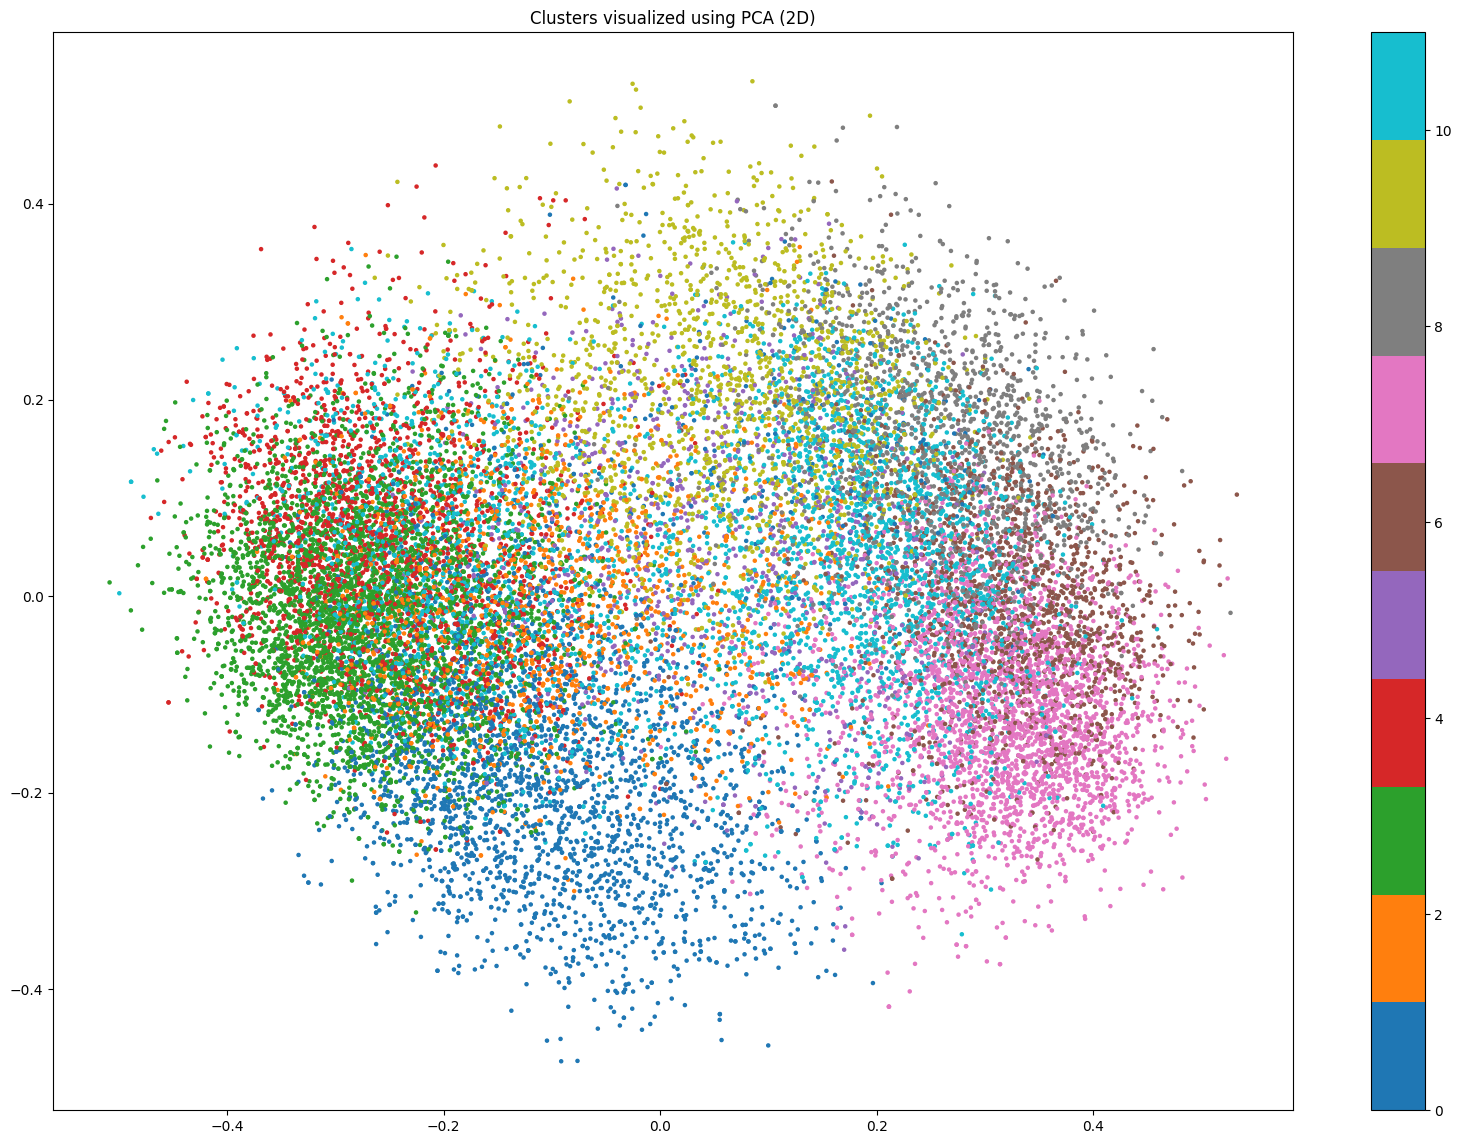

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=categories.astype(float),  # Ensure categories are float
    cmap='tab10',
    s=5
)

plt.title("Clusters visualized using PCA (2D)")
plt.colorbar()
plt.show()


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['Abstract'].tolist())
feature_names = vectorizer.get_feature_names_out()

In [17]:
cluster_keywords = {}

for cluster_id in np.unique(categories):
    indices = np.where(categories == cluster_id)[0]  
    cluster_tfidf = tfidf_matrix[indices].mean(axis=0).A1  
    top_indices = cluster_tfidf.argsort()[-10:][::-1]
    keywords = [feature_names[i] for i in top_indices]
    cluster_keywords[cluster_id] = keywords   

In [18]:
for cluster_id, keywords in cluster_keywords.items():
    print(f"Cluster {cluster_id}: {keywords}")

Cluster 0: ['learning', 'models', 'model', 'ann', 'frp', 'machine', 'ml', 'neural', 'data', 'concrete']
Cluster 1: ['concrete', 'frp', 'bars', 'bond', 'gfrp', 'strength', 'reinforced', 'bfrp', 'fiber', 'steel']
Cluster 2: ['bridge', 'deck', 'frp', 'bridges', 'concrete', 'construction', 'steel', 'design', 'decks', 'reinforced']
Cluster 3: ['beams', 'concrete', 'frp', 'rc', 'strengthened', 'shear', 'strengthening', 'beam', 'cfrp', 'reinforced']
Cluster 4: ['columns', 'concrete', 'confined', 'frp', 'axial', 'confinement', 'column', 'steel', 'tube', 'strain']
Cluster 5: ['joints', 'adhesive', 'joint', 'cfrp', 'bond', 'bonded', 'failure', 'steel', 'strength', 'joining']
Cluster 6: ['composites', 'inf', 'carbon', 'properties', 'mechanical', 'epoxy', 'composite', 'fiber', 'cfrp', 'matrix']
Cluster 7: ['composites', 'properties', 'fiber', 'fibers', 'mechanical', 'natural', 'composite', 'strength', 'matrix', 'tensile']
Cluster 8: ['process', 'cfrp', 'drilling', 'manufacturing', 'cutting', 'fibe

In [19]:
cluster_names = {
    0: "Machine Learning and Data-Driven FRP Modeling",
    1: "Bond Behavior and Reinforcement with FRP Bars",
    2: "FRP in Bridge Engineering and Deck Systems",
    3: "Flexural and Shear Strengthening of RC Beams Using FRP",
    4: "Confinement and Axial Strengthening of Concrete Columns",
    5: "FRP–Steel Joints, Adhesive Bonding and Interface Behavior",
    6: "Carbon Fiber Composites: Mechanical Behavior and Matrix Systems",
    7: "Natural Fiber and Bio-Based Composite Materials",
    8: "Manufacturing and Machining of FRP Composites",
    9: "Sandwich Composite Structures and Panel Stability",
    10: "Seismic Retrofitting of Masonry Walls Using FRP",
    11: "Damage, Fatigue, and Thermal Effects in Composite Laminates"
}

data['Cluster_ID'] = categories
data['Category'] = data['Cluster_ID'].map(cluster_names)



In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23085 entries, 0 to 23084
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        22985 non-null  object
 1   Author full names              22985 non-null  object
 2   Author(s) ID                   22985 non-null  object
 3   Title                          23084 non-null  object
 4   Year                           23085 non-null  int64 
 5   Source title                   22303 non-null  object
 6   Volume                         21919 non-null  object
 7   Issue                          14218 non-null  object
 8   Art. No.                       8483 non-null   object
 9   Page start                     14421 non-null  object
 10  Page end                       14359 non-null  object
 11  Page count                     23085 non-null  int64 
 12  Cited by                       23085 non-null  int64 
 13  D

In [21]:
import re

# Function to clean Excel sheet names
def clean_sheet_name(name):
    # Remove invalid characters and truncate to 31 chars
    cleaned = re.sub(r'[:\\/*?\[\]]', '', str(name))
    return cleaned[:31]

# Export to Excel with sanitized sheet names
with pd.ExcelWriter('Final Database.xlsx', engine='xlsxwriter') as writer:
    for category in data['Category'].unique():
        category_df = data[data['Category'] == category]
        sheet_name = clean_sheet_name(category)
        category_df.to_excel(writer, sheet_name=sheet_name, index=False)

g:\FRP data processing\.venv\Lib\site-packages\xlsxwriter\worksheet.py:1303: UserWarning: Ignoring URL 'https://orcid.org/0000-0003-3721-1293 Yuan Xin yuanxin9988@163.com 1 https://orcid.org/0000-0002-3504-253X Zhu Chaoyu zhuchaoyu@126.com 1 Zheng Wei robinwll@163.com 2 https://orcid.org/0000-0002-6050-3537 Tang Baijian tangbaijian@163.com 1 Nimbalkar Sanjay 1 School of Civil Engineering Suzhou University of Science and Technology Suzhou 215011 China usts.edu.cn 2 Suzhou Zhongheng Access Bridge Co., Ltd. Suzhou 215000 China 2019 19 12 2019 2019 02 08 2019 25 11 2019 19 12 2019 2019 Copyright © 2019 Xin Yuan et al. This is an open access article distributed under the Creative Commons Attribution License , which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is properly cited. Numerical investigation of mechanical behavior of carbon fiber-reinforced polymer- (CFRP-) reinforced concrete beam after high-temperature action of asphalt pavin